In [1]:
import pandas as pd
import numpy as np
from music21 import converter, chord, note, instrument, stream
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from IPython.display import set_matplotlib_formats
import librosa
from librosa.display import specshow
from collections import defaultdict
import msaf

plt.style.use('ggplot')
%pylab inline
set_matplotlib_formats('retina')

pd.set_option('display.max_columns', 999)


Populating the interactive namespace from numpy and matplotlib


In [2]:
midi = converter.parse('/Users/Haebichan/Desktop/Final Project Galvanize/C Major Midi/Stay With Me.mid')


for i in midi.parts:
            i.insert(0, instrument.Piano())

In [3]:
parts = instrument.partitionByInstrument(midi)

notes = []
notes_offset = []
durations = []

for i in parts.recurse():
    if isinstance(i, note.Note):
        notes.append(str(i.pitch))
        notes_offset.append(float(i.offset))
        durations.append(float(i.duration.quarterLength))

    elif isinstance(i, chord.Chord):
        notes_offset.append(float(i.offset))
        durations.append(float(i.duration.quarterLength))
        
        i = str(i).replace('>', '')
        chords = '|'.join(i.split()[1:])
        notes.append(chords)
        

                

In [4]:
melody = []
melody_offset = []
melody_durations = []

for i in midi[0].recurse():
    if isinstance(i, note.Note):
        melody.append(str(i.pitch))
        melody_offset.append(float(i.offset))
        melody_durations.append(float(i.duration.quarterLength))

    elif isinstance(i, chord.Chord):
        melody_offset.append(float(i.offset))
        melody_durations.append(float(i.duration.quarterLength))
        
        i = str(i).replace('>', '')
        chords = '|'.join(i.split()[1:])
        melody.append(chords)
        
                

In [5]:
harmony = []
harmony_offset = []
harmony_durations = []

for i in midi[1].recurse():
    if isinstance(i, note.Note):
        harmony.append(str(i.pitch))
        harmony_offset.append(float(i.offset))
        harmony_durations.append(float(i.duration.quarterLength))

    elif isinstance(i, chord.Chord):
        harmony_offset.append(float(i.offset))
        harmony_durations.append(float(i.duration.quarterLength))
        
        i = str(i).replace('>', '')
        chords = '|'.join(i.split()[1:])
        harmony.append(chords)
        
                

In [6]:
# there are extra 4 C harmony notes for some reason. I'm not sure why since they don't appear in the mid file

harmony = harmony[:-4]

In [7]:
# df = pd.DataFrame(notes).rename(columns = {0:'notes'}).join(pd.DataFrame(durations)).rename(columns = {0: 'durations'}).join(pd.DataFrame(notes_offset)).rename(columns = {0: 'offset'})

In [8]:
all_notes = sorted(set(notes))

In [9]:
all_notes

['A2',
 'A2|E3',
 'A3|C4',
 'A4',
 'A4|C5',
 'A5',
 'B4',
 'B5',
 'C3',
 'C3|E3',
 'C3|F3',
 'C5',
 'C5|E5',
 'C5|F5',
 'C6',
 'D5',
 'D6',
 'E3',
 'E4',
 'E4|G4|C5',
 'E5',
 'F4|A4',
 'G3|C4',
 'G4',
 'G4|C5|E5',
 'G5']

In [10]:
dic = {}

for i,j in enumerate(all_notes):
    dic[j] = i

In [ ]:
data = defaultdict(list)

for i in range(len(harmony)):
    count = 0
    
    while count < 2:  
        data[i].append(harmony[i])
        count += harmony_durations[i]


left_idx, duration_sum = 0, 0
for i in range(len(melody)):
    data[left_idx].append(melody[i])
    duration_sum += melody_durations[i]
    if duration_sum >= 2:
        duration_sum = 0
        left_idx += 1    
    


In [ ]:
max(dic.values())

In [ ]:
new_dic = defaultdict(list)

for i,j in data.items():
    for k in j:
        new_dic[i].append(dic[k])

In [ ]:
dic_list= []
for i,j in new_dic.items():
    dic_list.append(j)

In [ ]:
all_notes

In [ ]:
# Extra 6 C Harmony Notes
# dic_list = dic_list[:-6]

In [ ]:
df = pd.DataFrame(dic_list).fillna(max(dic.values())+1)

In [ ]:
self_similarity_matrix = squareform(pdist(df, metric='cosine'))

In [ ]:
len(dic_list)

In [ ]:
figure(figsize=(16, 16))
specshow(self_similarity_matrix, cmap='magma_r')

xticks(range(len(dic_list)), dic_list, rotation=90);
yticks(range(len(dic_list)), dic_list);
xlabel('Notes in 4 beats of time per block')
ylabel('Notes in 4 beats of time per block')

title("Im Yours", fontsize= 20);



In [33]:
# y2, sr2 = librosa.load('/Users/Haebichan/Desktop/Falling Slowly.wav')

In [117]:
mfcc = librosa.feature.mfcc(y=y, sr = sr)

In [118]:
chroma = librosa.feature.chroma_cens(y = y, sr = sr)

In [119]:
chroma_r = librosa.segment.recurrence_matrix(chroma)

In [120]:
R = librosa.segment.recurrence_matrix(mfcc, metric = 'cosine')

In [199]:
bounds = librosa.segment.agglomerative(chroma, 6)
bound_times = librosa.frames_to_time(bounds, sr=sr)

In [200]:
bound_times

array([  0.        ,  41.88879819,  51.08390023,  83.17387755,
        89.32716553, 143.19746032])

In [86]:
# import matplotlib.pyplot as plt
# figure(figsize=(10, 10))

# specshow(chroma_r, x_axis='time', y_axis='time', cmap='magma_r')

# # fig, ax = plt.subplots(figsize=(10,10))
# # cax = ax.matshow(chroma_r, interpolation='nearest', cmap = cm.magma_r)
# title('Music Self Similarity Matrix');

In [47]:
def process_music():
    y, sr = librosa.load('../Cant Feel My Face.mp3')
    decomposed = librosa.feature.mfcc(y = y, sr = sr)
    bounds = librosa.segment.agglomerative(decomposed, 6)
    bound_times = librosa.frames_to_time(bounds, sr=sr)
    bound_times
    
    figure(figsize=(10, 10))

    decomposed_r = librosa.segment.recurrence_matrix(decomposed)
    # specshow(chroma_r, x_axis='time', y_axis='time', cmap='magma_r')

    fig, ax = plt.subplots(figsize=(10,10))
    cax = ax.matshow(decomposed_r, interpolation='nearest', cmap = cm.magma_r)
    title('Music Self Similarity Matrix');


    return bound_times

<Figure size 720x720 with 0 Axes>

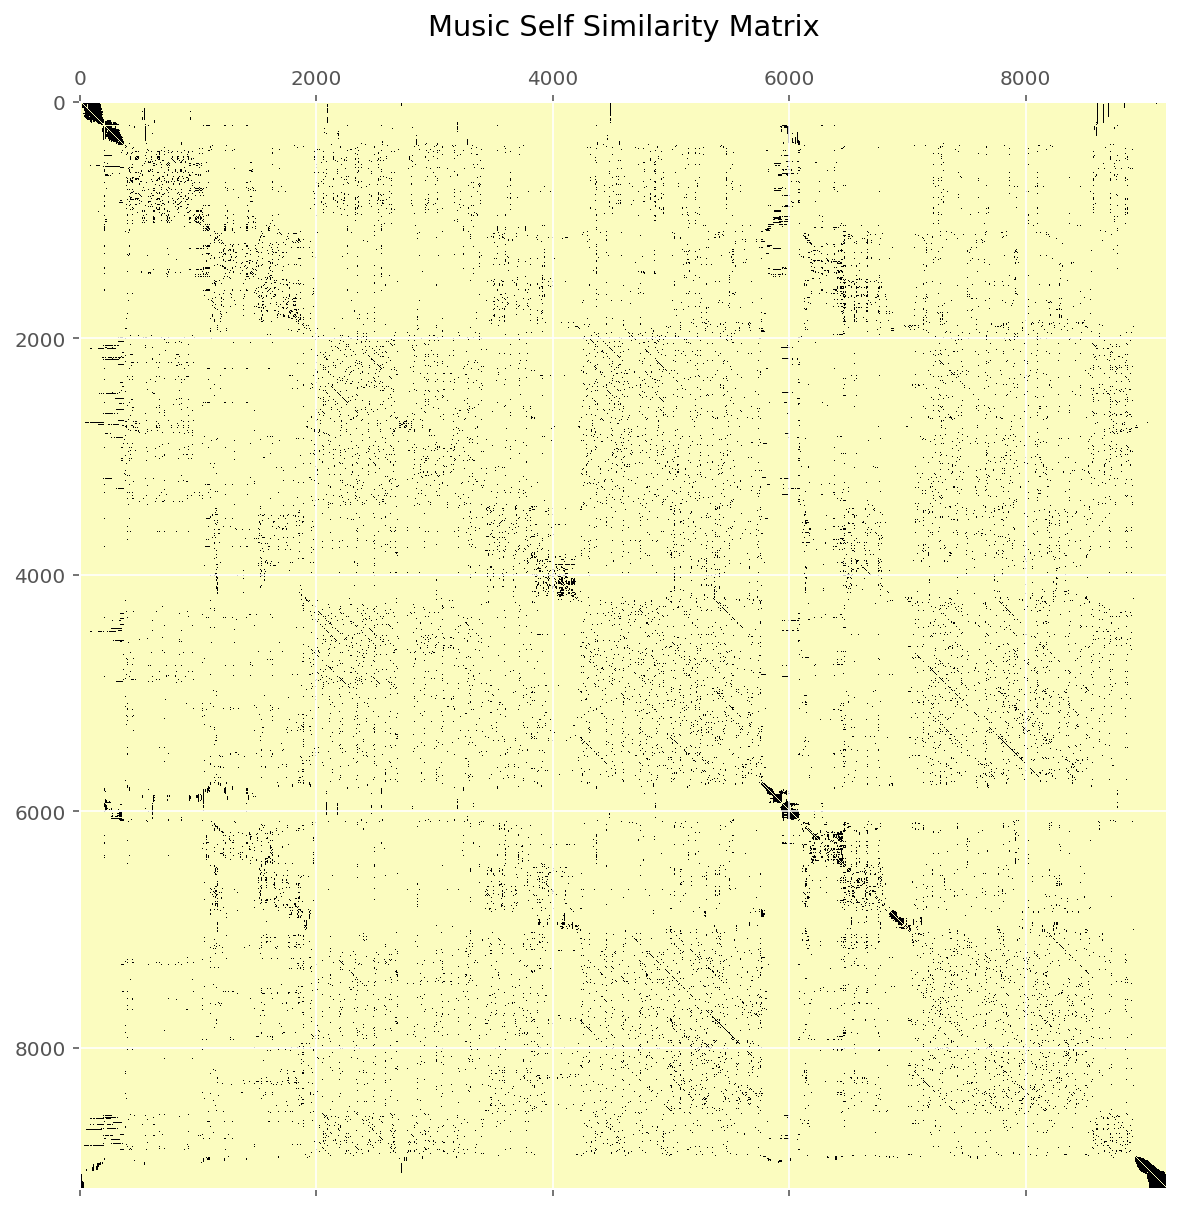

In [48]:
bound_times = process_music()

In [49]:
bound_times

array([  0.        ,   4.13315193,  25.77414966, 135.1169161 ,
       141.29342404, 207.02911565])

In [24]:
def process_music():
    y, sr = librosa.load('../Purpose.mp3')
    decomposed = librosa.feature.spectral_centroid(y = y, sr = sr)
    bounds = librosa.segment.agglomerative(decomposed, 6)
    bound_times = librosa.frames_to_time(bounds, sr=sr)
    bound_times
    
    
    decomposed_r = librosa.segment.recurrence_matrix(decomposed)
    
    fig, ax = plt.subplots(figsize=(10,10))
    cax = ax.matshow(decomposed_r, interpolation='nearest', cmap = cm.magma_r)
#     title("'Can't Feel My Face' Self-Similarity Matrix");


    return bound_times

array([  0.        ,  13.86231293,  42.84081633,  68.7078458 ,
        79.80698413, 200.64362812])

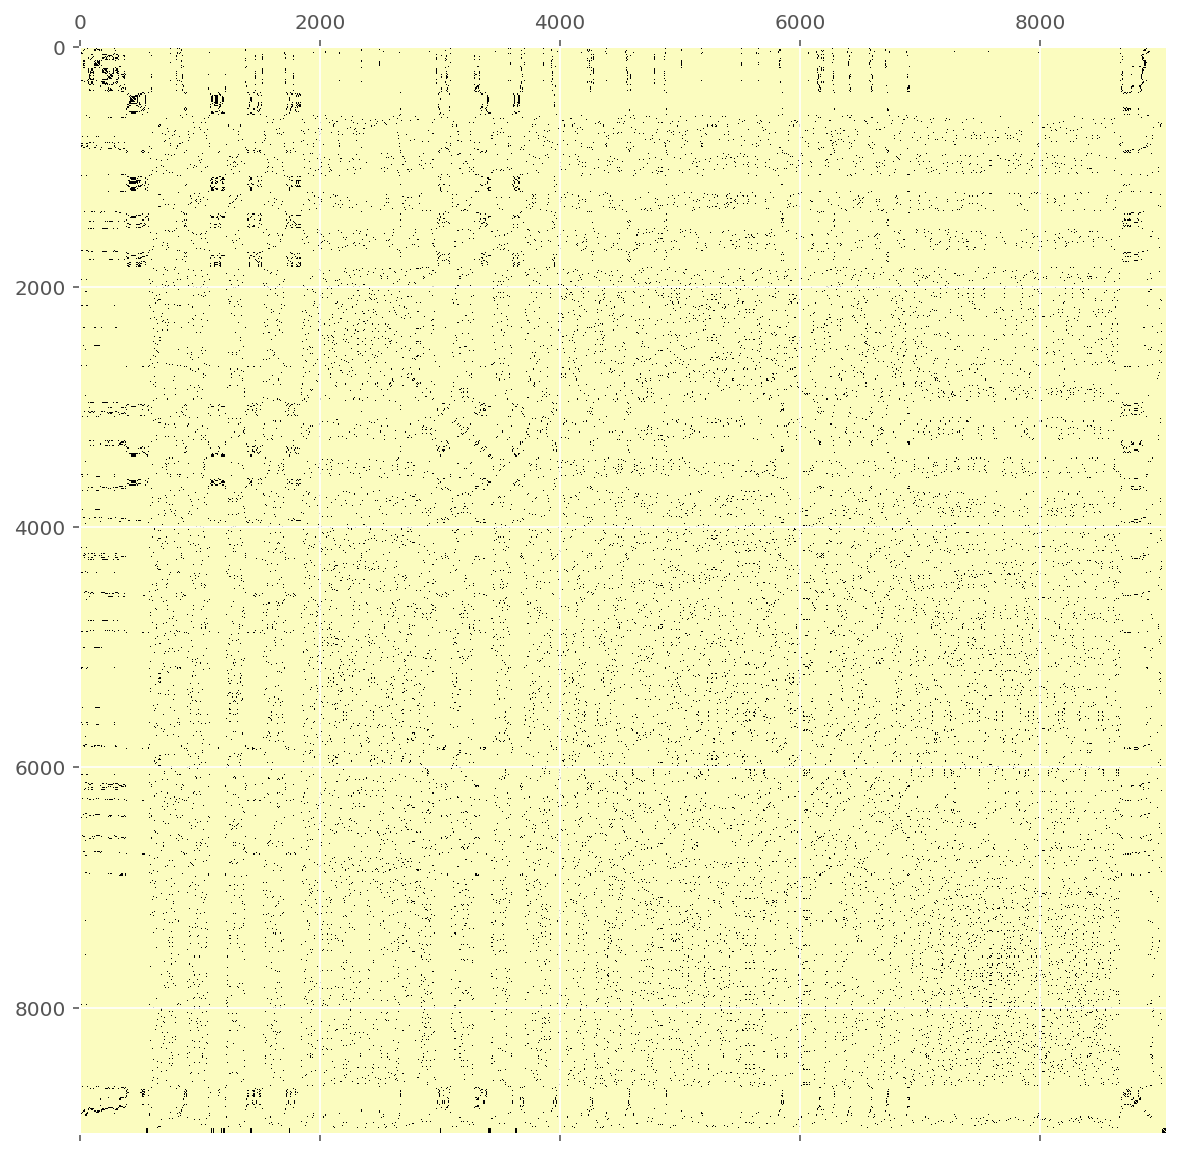

In [25]:
bound_times2 = process_music()
bound_times2

In [62]:
def create_df(bound_times, labels = np.array([1,2,3,1,3])):
    
    y, sr = librosa.load('../Cant Feel My Face.mp3')
    
    df = pd.DataFrame(bound_times).rename(columns = {0:'bounds'})[1:].reset_index().join(pd.DataFrame(labels).rename(columns = {0:'labels'})).drop('index',1)
    df.bounds = df.bounds.apply(lambda x: round(x, 0))
    df['bounds_percent'] = df.bounds.apply(lambda x: x / librosa.get_duration(y=y, sr=sr))
    df.bounds_percent = df.bounds_percent.apply(lambda x: round(x, 1) * 100)
    df.bounds_percent = df.bounds_percent.astype(int)
    
    return df

In [63]:
cantfeelmyface = create_df(bound_times)

In [25]:
# (df.bounds + df2.bounds) / 2

In [26]:
purpose = pd.DataFrame([1,2,3,4,2],  columns = ['labels']).join(pd.DataFrame([10,20,30,40,100], columns = ['bounds_percent']))

In [27]:
purpose

,labels,bounds_percent
0,1,10
1,2,20
2,3,30
3,4,40
4,2,100


In [28]:
fallingslowly = pd.DataFrame([1,2,1,2,3],  columns = ['labels']).join(pd.DataFrame([20,50,70,90,100], columns = ['bounds_percent']))

In [29]:
fallingslowly

,labels,bounds_percent
0,1,20
1,2,50
2,1,70
3,2,90
4,3,100


In [30]:
breakaway = pd.DataFrame([1,2,1,2,3],  columns = ['labels']).join(pd.DataFrame([20,40,50,10,100], columns = ['bounds_percent']))

In [31]:
breakaway

,labels,bounds_percent
0,1,20
1,2,40
2,1,50
3,2,10
4,3,100


In [32]:
staywithme = pd.DataFrame([1,2,2,2,3],  columns = ['labels']).join(pd.DataFrame([20,50,70,80,100], columns = ['bounds_percent']))

In [33]:
staywithme

,labels,bounds_percent
0,1,20
1,2,50
2,2,70
3,2,80
4,3,100


In [34]:
wheniwasyourman = pd.DataFrame([1,2,3,2,3],  columns = ['labels']).join(pd.DataFrame([20,20,50,60,100], columns = ['bounds_percent']))

In [35]:
wheniwasyourman

,labels,bounds_percent
0,1,20
1,2,20
2,3,50
3,2,60
4,3,100


In [36]:
imyours = pd.DataFrame([1,2,2,2,3],  columns = ['labels']).join(pd.DataFrame([10,30,90,90,100], columns = ['bounds_percent']))

In [37]:
imyours

,labels,bounds_percent
0,1,10
1,2,30
2,2,90
3,2,90
4,3,100


In [38]:
cantfeelmyface = pd.DataFrame([1,2,3,1,3],  columns = ['labels']).join(pd.DataFrame([0,10,60,70,100], columns = ['bounds_percent']))

In [39]:
cantfeelmyface

,labels,bounds_percent
0,1,0
1,2,10
2,3,60
3,1,70
4,3,100


In [40]:
# merged_songs = pd.concat([purpose, fallingslowly, breakaway,staywithme,wheniwasyourman,imyours])

In [41]:
# merged = pd.read_csv('merged.csv')

In [42]:
all_labels = pd.concat([purpose, fallingslowly, breakaway,staywithme,wheniwasyourman, imyours, cantfeelmyface],1).labels

In [43]:
all_bounds_percent = pd.concat([purpose, fallingslowly, breakaway,staywithme,wheniwasyourman, imyours, cantfeelmyface],1).bounds_percent

In [44]:
pd.DataFrame(all_bounds_percent.median(1))

,0
0,20.0
1,30.0
2,60.0
3,70.0
4,100.0


In [51]:
final_calc = all_labels.mode(1).rename(columns = {0:'segment_mode'}).join(pd.DataFrame(all_bounds_percent.median(1)).rename(columns = {0:'boundaries_median_percent'}))

In [52]:
final_calc

,segment_mode,boundaries_median_percent
0,1,20.0
1,2,30.0
2,3,60.0
3,2,70.0
4,3,100.0


In [53]:
final_calc.to_csv('music_state_representation.csv')

In [214]:
labels = np.array([1,2,1,3,1])

In [215]:
df = pd.DataFrame(bound_times).rename(columns = {0:'bounds'})[1:].reset_index().join(pd.DataFrame(labels).rename(columns = {0:'labels'})).drop('index',1)

In [216]:
df.bounds = df.bounds.apply(lambda x: round(x, 0))

In [217]:
df['bounds_percent'] = df.bounds.apply(lambda x: x / librosa.get_duration(y=y, sr=sr))

In [248]:
df.bounds_percent = df.bounds_percent.apply(lambda x: round(x, 1) * 100)

In [251]:
df.bounds_percent = df.bounds_percent.astype(int)

In [252]:
df

,bounds,labels,bounds_percent
0,42.0,1,20
1,51.0,2,30
2,83.0,1,40
3,89.0,3,50
4,143.0,1,80


In [253]:
data = pd.DataFrame(index = ['imagine'], columns =  np.arange(0,100,5))

In [257]:
data.apply(lambda x: if )

,0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95
0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
4,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [325]:
for index,row in data.iterrows():
    for i in row.index:
        if i in df.bounds_percent.values:
            data.loc[:,i] = df.labels[df.bounds_percent == i].values

In [326]:
data

,0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95
imagine,NaN,NaN,NaN,NaN,1,NaN,2,NaN,1,NaN,3,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN


In [122]:
audiofile = '/Users/Haebichan/Desktop/imagine.mp3'

In [174]:
msaf.get_all_boundary_algorithms()

['olda', 'cnmf', 'example', 'sf', 'scluster', 'foote', 'vmo']

In [188]:
bounds, labels = msaf.process(audiofile, boundaries_id="olda", labels_id="fmc2d")

In [189]:
bounds

array([  0.        ,   3.0185941 ,  36.40888889,  45.92907029,
        50.01578231,  52.4306576 ,  87.26058957,  90.55782313,
       113.35981859, 115.77469388, 144.10303855, 151.25478458,
       153.71609977, 185.10947846, 185.12979592])

In [181]:
labels

[4.0, 3.0, 1.0, 2.0, 2.0, 3.0, 2.0, 0.0, 1.0, 3.0, 1.0, 2.0, 0.0, 4.0]

In [168]:
df = pd.DataFrame(bounds).rename(columns = {0:'bounds'})[1:].reset_index().join(pd.DataFrame(labels).rename(columns = {0:'labels'}))

In [169]:
df.drop('index',1, inplace = True)

In [170]:
df = df.apply(lambda x: round(x, 2))

In [171]:
df.bounds = df.bounds.apply(lambda x: x / max(df.bounds))

In [190]:
df.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
bounds,0.016313,0.196673,0.248096,0.270189,0.283206,0.471344,0.48917,0.612326,0.625344,0.778372,0.816993,0.830335,0.999892,1.0
labels,4.000000,3.000000,1.000000,2.000000,2.000000,3.000000,2.00000,0.000000,1.000000,3.000000,1.000000,2.000000,0.000000,4.0


In [7]:
librosa.get_duration(y=y, sr=sr)

126.80045351473923

In [8]:
S = np.abs(librosa.stft(y))

In [12]:
comps, acts = librosa.decompose.decompose(S, n_components = 5, sort = True)

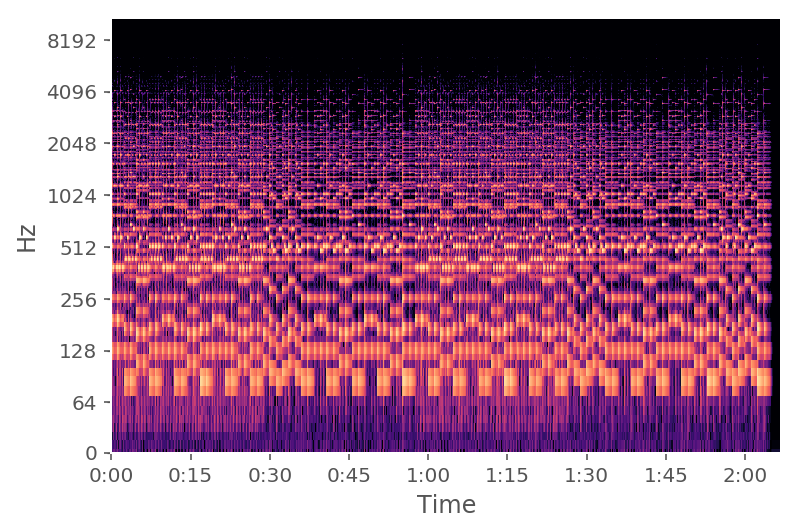

In [13]:
specshow(librosa.amplitude_to_db(S, ref=np.max), y_axis='log', x_axis='time');

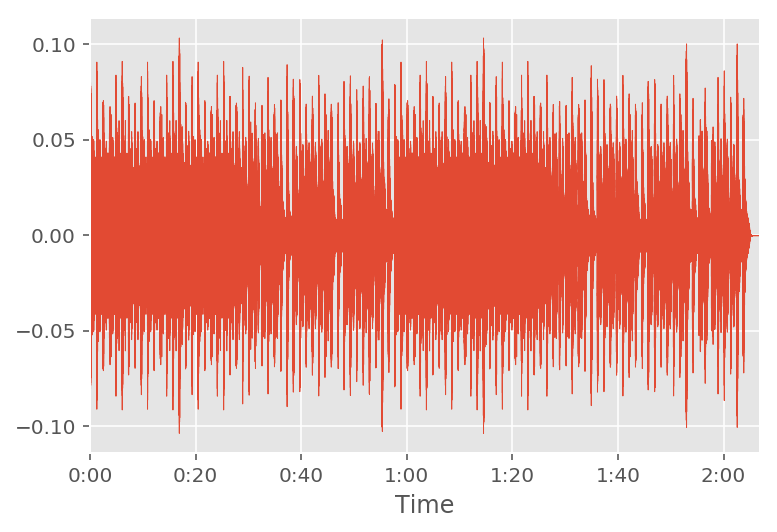

In [14]:
librosa.display.waveplot(y, sr)

In [21]:
comps

array([[2.32269008e-02, 2.67722771e-02, 2.64214828e-02, 3.28622713e-02,
        2.93491670e-02],
       [1.87700308e-02, 2.52968098e-02, 1.97247823e-02, 2.24213907e-02,
        2.30329328e-02],
       [4.23641809e-02, 2.93932634e-02, 1.25143222e-02, 7.50384123e-03,
        1.13119764e-02],
       ...,
       [3.18030380e-07, 3.19164387e-07, 2.54361606e-07, 2.98428217e-07,
        2.96095481e-07],
       [2.88772773e-07, 2.72838132e-07, 2.59498245e-07, 2.86794756e-07,
        2.72545549e-07],
       [2.72527612e-07, 2.32021113e-07, 2.14019055e-07, 2.70033166e-07,
        2.40919666e-07]])